In [117]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

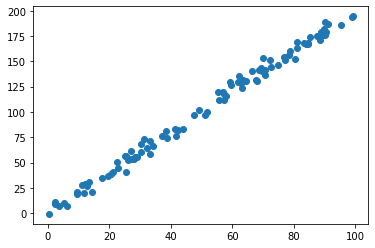

In [118]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

In [119]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))

In [120]:
#Momentum
EPOCHS = 50
LEARNING_RATE = 0.0001
theta0 = 1
theta1 = 1
prev_upd_theta0 = 0
prev_upd_theta1 = 0
gamma = 0.9
for _ in range (EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    cur_upd_theta0 = gamma * prev_upd_theta0 + LEARNING_RATE * dt0
    theta0 = theta0 - cur_upd_theta0
    cur_upd_theta1 = gamma * prev_upd_theta1 + LEARNING_RATE * dt1
    theta1 = theta1 - cur_upd_theta1
    
    print("theta0:", theta0, "theta1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))
    prev_upd_theta0 = cur_upd_theta0
    prev_upd_theta1 = cur_upd_theta1

theta0: 1.0051364098314612 theta1: 1.3436364297565564 cost: 744.0755802239706
theta0: 1.0131205338050433 theta1: 1.8778823214169416 cost: 34.80665091984221
theta0: 1.0209079523576772 theta1: 2.3991928211206814 cost: 293.01419401373835
theta0: 1.0258255060128927 theta1: 2.7288443818442443 cost: 940.7426497007814
theta0: 1.0264573664069903 theta1: 2.772168829177202 cost: 1053.7757878829348
theta0: 1.0230083119135351 theta1: 2.542838309662416 cost: 529.1175994248414
theta0: 1.0170710434259107 theta1: 2.1473100389235036 cost: 51.05557209361178
theta0: 1.0109374869862813 theta1: 1.738786355449647 cost: 124.55222034388089
theta0: 1.0067375040688828 theta1: 1.4596369047076696 cost: 506.2893741646631
theta0: 1.005719687148341 theta1: 1.3933193131002708 cost: 636.5452698661896
theta0: 1.007908385940287 theta1: 1.54145108962365 cost: 366.5281152801231
theta0: 1.0122177764138658 theta1: 1.831435084192664 cost: 57.34436490502585
theta0: 1.0169378789688415 theta1: 2.1489499500201843 cost: 51.920895

In [125]:
#NAG
EPOCHS = 50
LEARNING_RATE = 0.0001
theta0 = 1
theta1 = 1
prev_upd_theta0 = 0
prev_upd_theta1 = 0
gamma = 0.9
for _ in range (EPOCHS):
    ahead_theta0 = theta0 - gamma * prev_upd_theta0
    ahead_theta1 = theta1 - gamma * prev_upd_theta1
    dt0 = der_theta0(X, Y, ahead_theta0, ahead_theta1)
    dt1 = der_theta1(X, Y, ahead_theta0, ahead_theta1)
     
    cur_upd_theta0 = gamma * prev_upd_theta0 + LEARNING_RATE * dt0
    theta0 = theta0 - cur_upd_theta0
    cur_upd_theta1 = gamma * prev_upd_theta1 + LEARNING_RATE * dt1
    theta1 = theta1 - cur_upd_theta1
    
    print("theta0:", theta0, "theta1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))
    prev_upd_theta0 = cur_upd_theta0
    prev_upd_theta1 = cur_upd_theta1

theta0: 1.0051364098314612 theta1: 1.3436364297565564 cost: 744.0755802239706
theta0: 1.0115229845694684 theta1: 1.7710853290275765 cost: 97.75462273615787
theta0: 1.0164370798819942 theta1: 2.1003126790875575 cost: 30.168556813877466
theta0: 1.0187819474801538 theta1: 2.2579788270992567 cost: 130.37509876701696
theta0: 1.0187976667093028 theta1: 2.2601138769129574 cost: 132.3210461070442
theta0: 1.017429182412172 theta1: 2.1698704817416314 cost: 63.792522755195186
theta0: 1.01571053260427 theta1: 2.0563589554497805 cost: 17.537290614997676
theta0: 1.0143712526990925 theta1: 1.9683350195330043 cost: 12.304602472058757
theta0: 1.0137096054525612 theta1: 1.9257250037798874 cost: 19.38457354119187
theta0: 1.0136668051754458 theta1: 1.9245876325598497 cost: 19.6595771438609
theta0: 1.0139940406091634 theta1: 1.9482794634408407 cost: 14.855944586907926
theta0: 1.014416501000966 theta1: 1.9784200007654478 cost: 11.54677501828342
theta0: 1.0147389960300603 theta1: 2.0019523395210523 cost: 11.

In [127]:
#RMSprop
EPOCHS = 100
LEARNING_RATE = 0.1
theta0 = 1
theta1 = 1
betta = 0.9
grsq_t0 = 0 #квадрат градиента
grsq_t1 = 0 #квадрат градиента
for _ in range (EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    grsq_t0 = betta * grsq_t0 + (1 - betta) * dt0 * dt0
    grsq_t1 = betta * grsq_t1 + (1 - betta) * dt1 * dt1
    
    theta0 = theta0 - (LEARNING_RATE / np.sqrt( grsq_t0)) * dt0
    theta1 = theta1 - (LEARNING_RATE / np.sqrt( grsq_t1)) * dt1
      
    print("theta0:", theta0, "theta1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

theta0: 1.316227766016838 theta1: 1.316227766016838 cost: 796.185670509775
theta0: 1.4997231151434796 theta1: 1.5000160029810508 cost: 421.9684976576832
theta0: 1.6273737036000506 theta1: 1.6281429558671245 cost: 232.15745734600551
theta0: 1.7212605863810075 theta1: 1.7226727769051804 cost: 129.5478654593114
theta0: 1.7915174495088353 theta1: 1.7937363309275975 cost: 73.33601382123747
theta0: 1.8440470183289275 theta1: 1.8472352604200484 cost: 42.86715556147646
theta0: 1.8828576029297222 theta1: 1.887175194787633 cost: 26.75543724902109
theta0: 1.9109557785147497 theta1: 1.9165577665752735 cost: 18.523177088079404
theta0: 1.9307283915284497 theta1: 1.937763126032472 cost: 14.488198952229736
theta0: 1.9441161959727602 theta1: 1.9527245852143604 cost: 12.602353383734194
theta0: 1.9526989463742506 theta1: 1.9630147829892717 cost: 11.766385313096187
theta0: 1.9577451095661187 theta1: 1.9698962634720425 cost: 11.416670599308839
theta0: 1.9602501204089746 theta1: 1.9743602764719637 cost: 11.

In [132]:
cost_function(X,Y,10,10)

114376.97544812216